<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 164.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 162.5 MB/s eta 0:00:00


Import pandas module


In [4]:
import pandas as pd


Import matplotlib


In [5]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [9]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [8]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [10]:
## Write your code here
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())


Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [12]:
## Write your code here
subset_cols = ["MainBranch", "Employment", "RemoteWork"]
duplicate_subset = df[df.duplicated(subset=subset_cols, keep=False)]

identical_counts = {}
for col in df.columns:
    identical_counts[col] = (duplicate_subset.groupby(subset_cols)[col]
                             .transform(lambda x: x.nunique()) == 1).sum()

print("Number of duplicates based on subset columns:")
print(duplicate_subset.shape[0])
print("\nColumns that frequently have identical values in these duplicates:")
for col, count in identical_counts.items():
    if count > 0:
        print(f"{col}: {count} identical values")


Number of duplicates based on subset columns:
65290

Columns that frequently have identical values in these duplicates:
MainBranch: 54690 identical values
Age: 88 identical values
Employment: 54690 identical values
RemoteWork: 54690 identical values
Check: 54690 identical values
CodingActivities: 2 identical values
EdLevel: 54 identical values
LearnCode: 25 identical values
LearnCodeOnline: 82 identical values
TechDoc: 173 identical values
YearsCode: 29 identical values
YearsCodePro: 17 identical values
DevType: 40 identical values
OrgSize: 50 identical values
PurchaseInfluence: 69 identical values
BuyNewTool: 15 identical values
BuildvsBuy: 81 identical values
TechEndorse: 17 identical values
Country: 42 identical values
Currency: 21 identical values
CompTotal: 99 identical values
LanguageHaveWorkedWith: 31 identical values
LanguageWantToWorkWith: 48 identical values
LanguageAdmired: 71 identical values
DatabaseHaveWorkedWith: 87 identical values
DatabaseWantToWorkWith: 115 identical 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


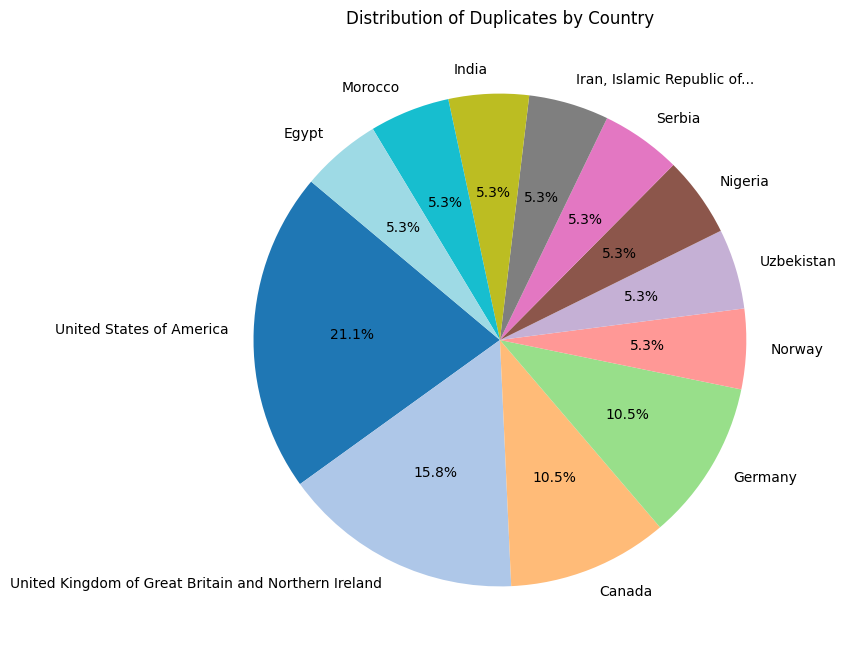

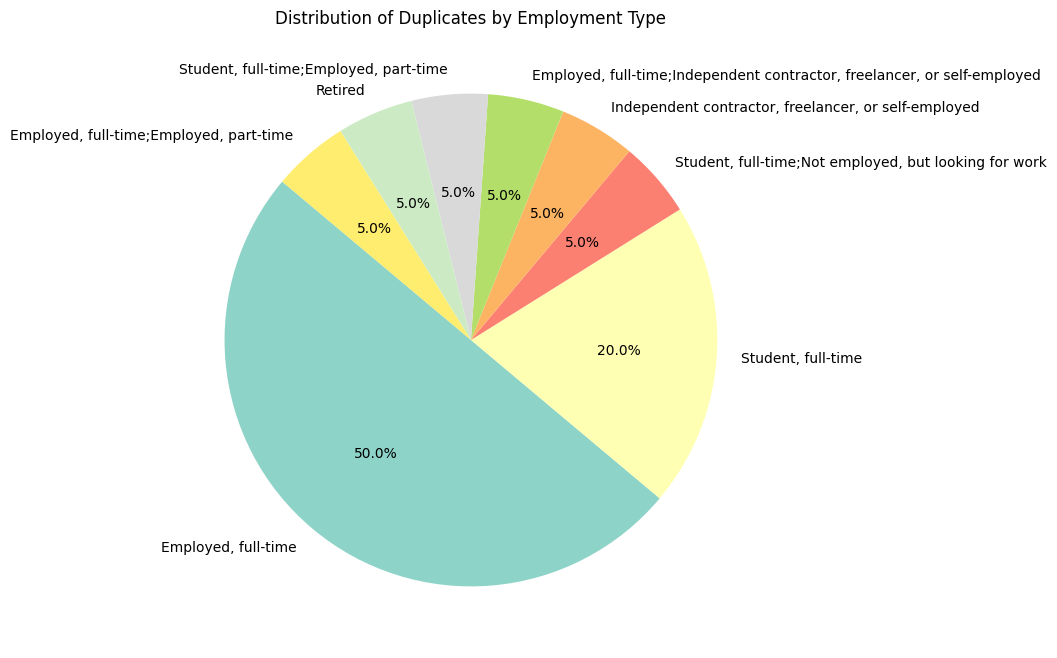

In [14]:
## Write your code here
import matplotlib.pyplot as plt

# Filtrare solo i duplicati
duplicates = df[df.duplicated(keep=False)]

# Distribuzione per Paese
country_counts = duplicates['Country'].value_counts()
plt.figure(figsize=(8,8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title("Distribution of Duplicates by Country")
plt.ylabel("")  # rimuove l'etichetta y
plt.show()

# Distribuzione per tipo di Employment
employment_counts = duplicates['Employment'].value_counts()
plt.figure(figsize=(8,8))
employment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title("Distribution of Duplicates by Employment Type")
plt.ylabel("")  # rimuove l'etichetta y
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [15]:
## Write your code here

key_columns = ['MainBranch', 'Employment', 'Country', 'RemoteWork']


print("Number of duplicates before removal:", df.duplicated(subset=key_columns).sum())


df_cleaned = df.drop_duplicates(subset=key_columns, keep='first')


print("Number of duplicates after removal:", df_cleaned.duplicated(subset=key_columns).sum())


print(df_cleaned.head())


Number of duplicates before removal: 58516
Number of duplicates after removal: 0
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4        

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
